Question 1


In [1]:
import pickle

with open('/content/drive/MyDrive/mnist_train.pkl', 'rb') as file:
  mnist_train = pickle.load(file)

train_images , train_labels = mnist_train

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
train_images = train_images.reshape((1000, -1))

In [2]:
from sklearn.preprocessing import StandardScaler

population_mean = train_images.mean(axis=0)

# Center the data by subtracting the population mean
scaler = StandardScaler(with_mean=True, with_std=False)
train_images_centered = scaler.fit_transform(train_images)

In [3]:
train_images_centered

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

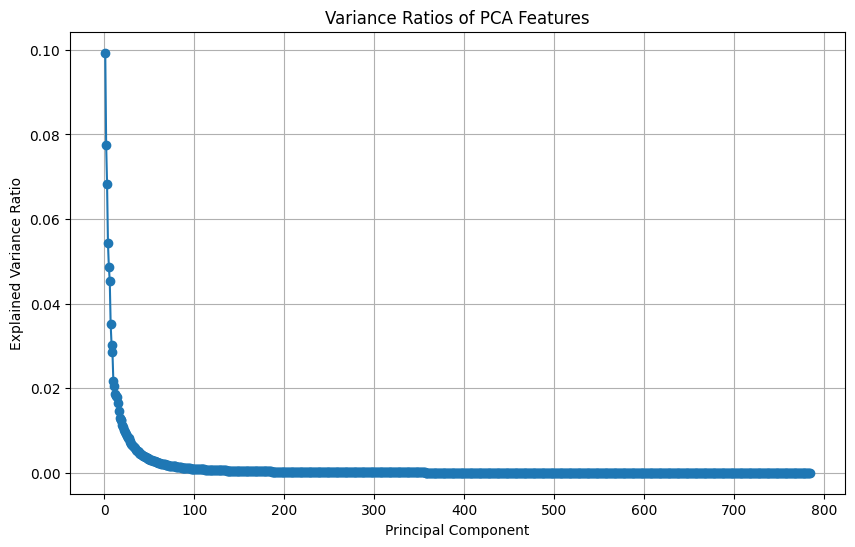

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_images_centered)

# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot variance ratios
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, marker='o', linestyle='-')
plt.title('Variance Ratios of PCA Features')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

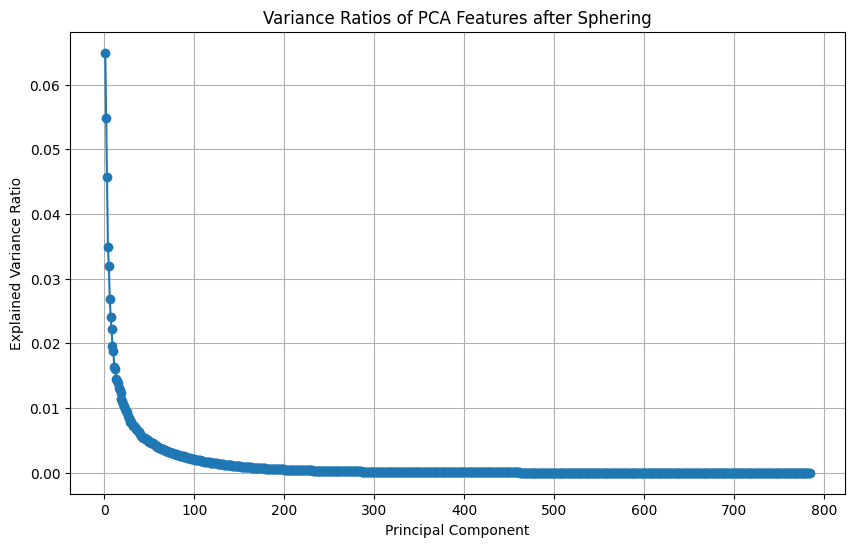

In [5]:
train_images, train_labels = mnist_train

# Normalize pixel values to be between 0 and 1
train_images_normalized = train_images / 255.0
train_images_flattened = train_images_normalized.reshape((1000, -1))

# Compute the population mean
population_mean = train_images_flattened.mean(axis=0)

# Center the data by subtracting the population mean
scaler = StandardScaler(with_mean=True, with_std=False)
train_images_centered = scaler.fit_transform(train_images_flattened)

# Divide values of each feature by its standard deviation (sphering)
scaler = StandardScaler(with_mean=False, with_std=True)
train_images_sphered = scaler.fit_transform(train_images_centered)

# Implement PCA
pca = PCA()
pca.fit(train_images_sphered)

# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot variance ratios
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, marker='o', linestyle='-')
plt.title('Variance Ratios of PCA Features after Sphering')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Sphering the data divides each feature by its standard deviation, resulting in unit variance for each feature. This transformation may affect the variance ratios compared to the results obtained in part 1, where only centering was performed. The variance ratios may change after sphering because the variance of each feature is now standardized, which could impact the relative importance of each principal component. However, the overall structure of the data remains the same, so the changes may not be significant depending on the dataset and the number of principal components

